## Cardiac Patients— Markers and Trends

#### PUBH 1142: Intro to Health Data Science  
#### Professor Juan Klopper  
#### Nareg Panossian

>##### Cardiovascular diseases like heart disease, heart attacks, and strokes are the leading cause of deaths globally and in the United States. These disease not only cause hundreds of thousands of deaths in the US each year, but also cost the US hundreds of billions of dollars in medical costs and lost productivity. Moreover, as the population continues to age, non-communicable diseases like heart disease are becoming even more of a burden. 

>##### In the past few decades, significant strides have been made in surgical, pharmaceutical, and other methods of treatment and evaluation for cardiovascular disease. There are several factors that can help physicians and public health professionals diagnose and/or understand an individual's risk for cardiovascular disease. Age, sex, cholesterol levels, heart rates, electrocardiogram results, blood pressure, and other markers are typically collected and used when analyzing cardiovascular issues. 

>##### Source: https://www.cdc.gov/heartdisease/facts.htm

>##### In this notebook, we will explore sample demographic and lab result data from real cardiac patients. The data is taken from the "heart.csv" dataset, which is publically available on Kaggle. Understanding the relationships between the variables in this dataset can provide insight into the prediction, diagnosis, and risks for cardiac conditions like heart disease.

>##### To get started, we will import the libraries that we need for data analysis as well as the heart.csv dataset.

In [2]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# importing the dataset as df
df = pd.read_csv('https://raw.githubusercontent.com/naregp/PUBH1142/main/heart.csv')

>##### Next, we will take a look at the first 5 rows of the dataset to understand its characteristics and see the variables that we are dealing with

In [4]:
# show the first 5 rows of the dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


>##### For the sake of readability, we will rename the variables to be more clear. The variables (with  renames noted) are as follows:

<span style="color:red;">age </span>: the age of the patients

<span style="color:red;">sex </span>: the sex of the patients

cp -> <span style="color:red;">chest_pain_type </span>: the type of chest pain

trestbps -> <span style="color:red;">resting_blood_pressure </span>: the resting blood pressure of the patient

chol -> <span style="color:red;">cholesterol </span>: serum cholesterol

fbs -> <span style="color:red;">fasting_blood_sugar </span>: fasting blood sugar > 120 mg/dl

resecg -> <span style="color:red;">resting_electrocardiogram </span>: resting electrocradiographic results

thalach -> <span style="color:red;">max_heart_rate_achieved </span>: maximum heart rate achieved

exang -> <span style="color:red;">exercise_induced_angina </span>: exercise induced angina

oldpeak -> <span style="color:red;">st_depression </span>: ST depression induced by exercise relative to rest

slope -> <span style="color:red;">st_slope </span>: slope of the peak exercise ST segment

ca -> <span style="color:red;">num_major_vessels </span>: number of major vessels colored by fluroscopy

thal -> <span style="color:red;">thalassemia </span>: thalium stress test result

In [5]:
df = df.rename(
    columns = {'cp':'chest_pain_type', 
               'trestbps':'resting_blood_pressure', 
               'chol': 'cholesterol',
               'fbs': 'fasting_blood_sugar',
               'restecg' : 'resting_electrocardiogram', 
               'thalach': 'max_heart_rate_achieved', 
               'exang': 'exercise_induced_angina',
               'oldpeak': 'st_depression', 
               'slope': 'st_slope', 
               'ca':'num_major_vessels', 
               'thal': 'thalassemia'}, 
    errors="raise")

>##### Here are the first five rows with the updated names:

In [6]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


>##### It will be useful to get summary statistics, like the average, of each of the variables. Here is a summary:

In [13]:
# show summary statistics for each variable
df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


>Highlights:
>* The average age of the patients is 54
>* The average resting blood pressure is 131.61
>* The average cholesterol level is 246
>* The average maximum heart rate achieved is 149.11

>##### Now, we can start comparing the different variables visually in order to get an understanding of how they may be related.

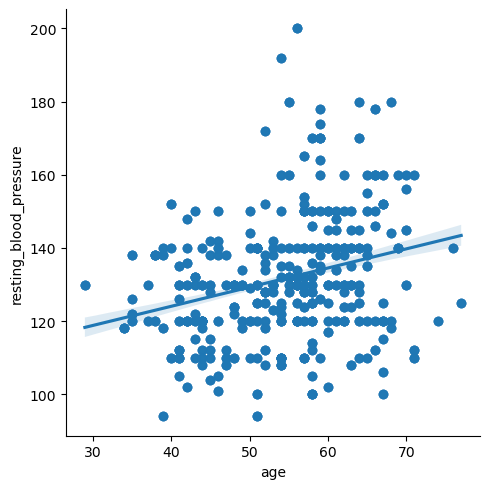

In [29]:
# make a graph comparing age on the x-axis and resting blood pressure on the y-axis and add a line of best fit
sns.lmplot(x='age', y='resting_blood_pressure', data=df)

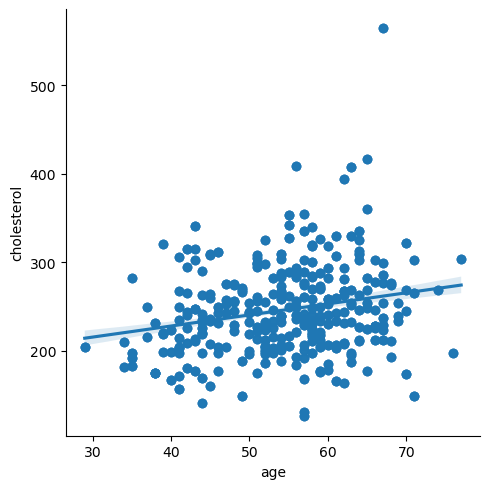

In [28]:
# make a graph comparing age on the x-axis and cholesterol on the y-axis and add a line of best fit
sns.lmplot(x='age', y='cholesterol', data=df)
